In [1]:
# import libraries 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#read in the CSV as a dataframe 
df = pd.read_csv(Path('Resources/fifa_cleaned.csv'))
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [3]:
df.isnull().sum()

id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
lb            2065
lcb           2065
cb            2065
rcb           2065
rb            2065
Length: 92, dtype: int64

In [4]:
df.size

1651768

In [5]:
# drop columns with null value 
NoNull=df.dropna()

In [6]:
NoNull.size

14352

In [7]:
NoNull.columns

Index(['id', 'name', 'full_name', 'birth_date', 'age', 'height_cm',
       'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot',
       'international_reputation_1_5', 'weak_foot_1_5', 'skill_moves_1_5',
       'work_rate', 'body_type', 'release_clause_euro', 'club_team',
       'club_rating', 'club_position', 'club_jersey_number', 'club_join_date',
       'contract_end_year', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle',
     

In [8]:
NoNull.dtypes
NoNull["value_euro"].dtypes

dtype('float64')

In [9]:
newdf=NoNull.select_dtypes(include=["int64","float64"])
newdf

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation_1_5,weak_foot_1_5,...,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,158023,31,170.18,72.1,94,94,110500000.0,565000.0,5,4,...,75,96,33,28,26,6,11,15,14,8
1,190460,27,154.94,76.2,88,89,69500000.0,205000.0,3,5,...,67,88,59,57,22,9,14,7,7,6
2,195864,25,190.50,83.9,88,91,73000000.0,255000.0,4,4,...,82,87,63,67,67,5,6,2,4,3
3,198219,27,162.56,59.0,88,88,62000000.0,165000.0,3,4,...,61,83,51,24,22,8,4,14,9,10
5,203376,27,193.04,92.1,88,90,59500000.0,215000.0,3,3,...,62,87,90,89,84,13,10,13,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,176580,32,182.88,86.2,91,91,80000000.0,455000.0,5,4,...,85,85,62,45,38,27,25,31,33,37
17940,183277,28,172.72,76.2,91,91,93000000.0,340000.0,4,4,...,86,91,34,27,22,11,12,6,8,8
17941,192985,27,154.94,69.9,91,92,102000000.0,355000.0,4,5,...,79,90,68,58,51,15,13,5,10,13
17943,190871,27,175.26,68.0,92,92,108000000.0,290000.0,5,5,...,81,94,27,24,33,9,9,15,15,11


In [10]:
newdf.shape

(156, 50)

In [11]:
# y variable/ target variable 
y= newdf.value_euro

In [12]:
# x variables/ factors 
x=newdf.drop(columns="value_euro") 

In [13]:
# explore Y
y

0        110500000.0
1         69500000.0
2         73000000.0
3         62000000.0
5         59500000.0
            ...     
17938     80000000.0
17940     93000000.0
17941    102000000.0
17943    108000000.0
17944     77000000.0
Name: value_euro, Length: 156, dtype: float64

In [14]:
x.shape

(156, 49)

In [15]:
y.count()

156

In [19]:
# split into training and testing sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    random_state=1, 
                                                    )
X_train.shape
# remember had to remove stratisfy because of small data size 

(117, 49)

In [20]:
# create the instance 
model =LinearRegression()

In [22]:
#fit the model- this needed to be a variable 
c=model.fit(X_train, y_train)

In [23]:
# Use model to predict on Test Data 
y_pred=c.predict(X_test)
print(y_pred)

[32799540.2610135   6633496.78265148  -784754.42408163 33802296.47401465
 27967034.14230164 16029873.71325373 36638971.36047154 32534625.91228429
 -4423359.84435235 47233908.88847184 94698562.10373819  -341949.5490598
 20055626.35050452  7322584.16428814 25373224.54034896 85261695.49086227
 43116416.24900667 50013196.61480378 41970497.38687186 28787740.18942758
  -913881.95887825 54752080.66120689 41836949.52476564 18889421.54155857
 20384665.60008825 10822222.14674046 21593496.64719545  8670999.26129434
 29575159.29324007  6999032.20977062 23460744.88380409 57620056.82160667
  4880196.63842475 27547538.57454132 63008555.91128752 -1377641.63572509
 39960212.91225918 54709676.79667468 80283832.30932377]


ValueError: x and y must be the same size

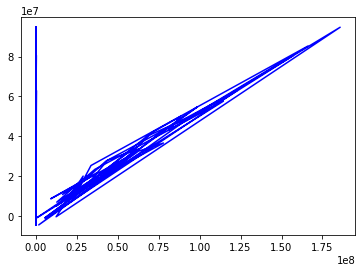

In [24]:
#plot prediction line against actual test data
plt.plot(X_test,y_pred,label='Baseline Linear Regression Model',color='b')
plt.scatter(X_test, y_test, label='Actual Test Data',color='g' )
plt.show()
#google how to plot a multiple linear regression in matplot lib 

In [27]:
# now what metric will tell us about preformance accuracy,  
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9742167893756332
